<a href="https://colab.research.google.com/github/Thanchanokning/229352/blob/main/Copy_of_Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [4]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [6]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [7]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=12)

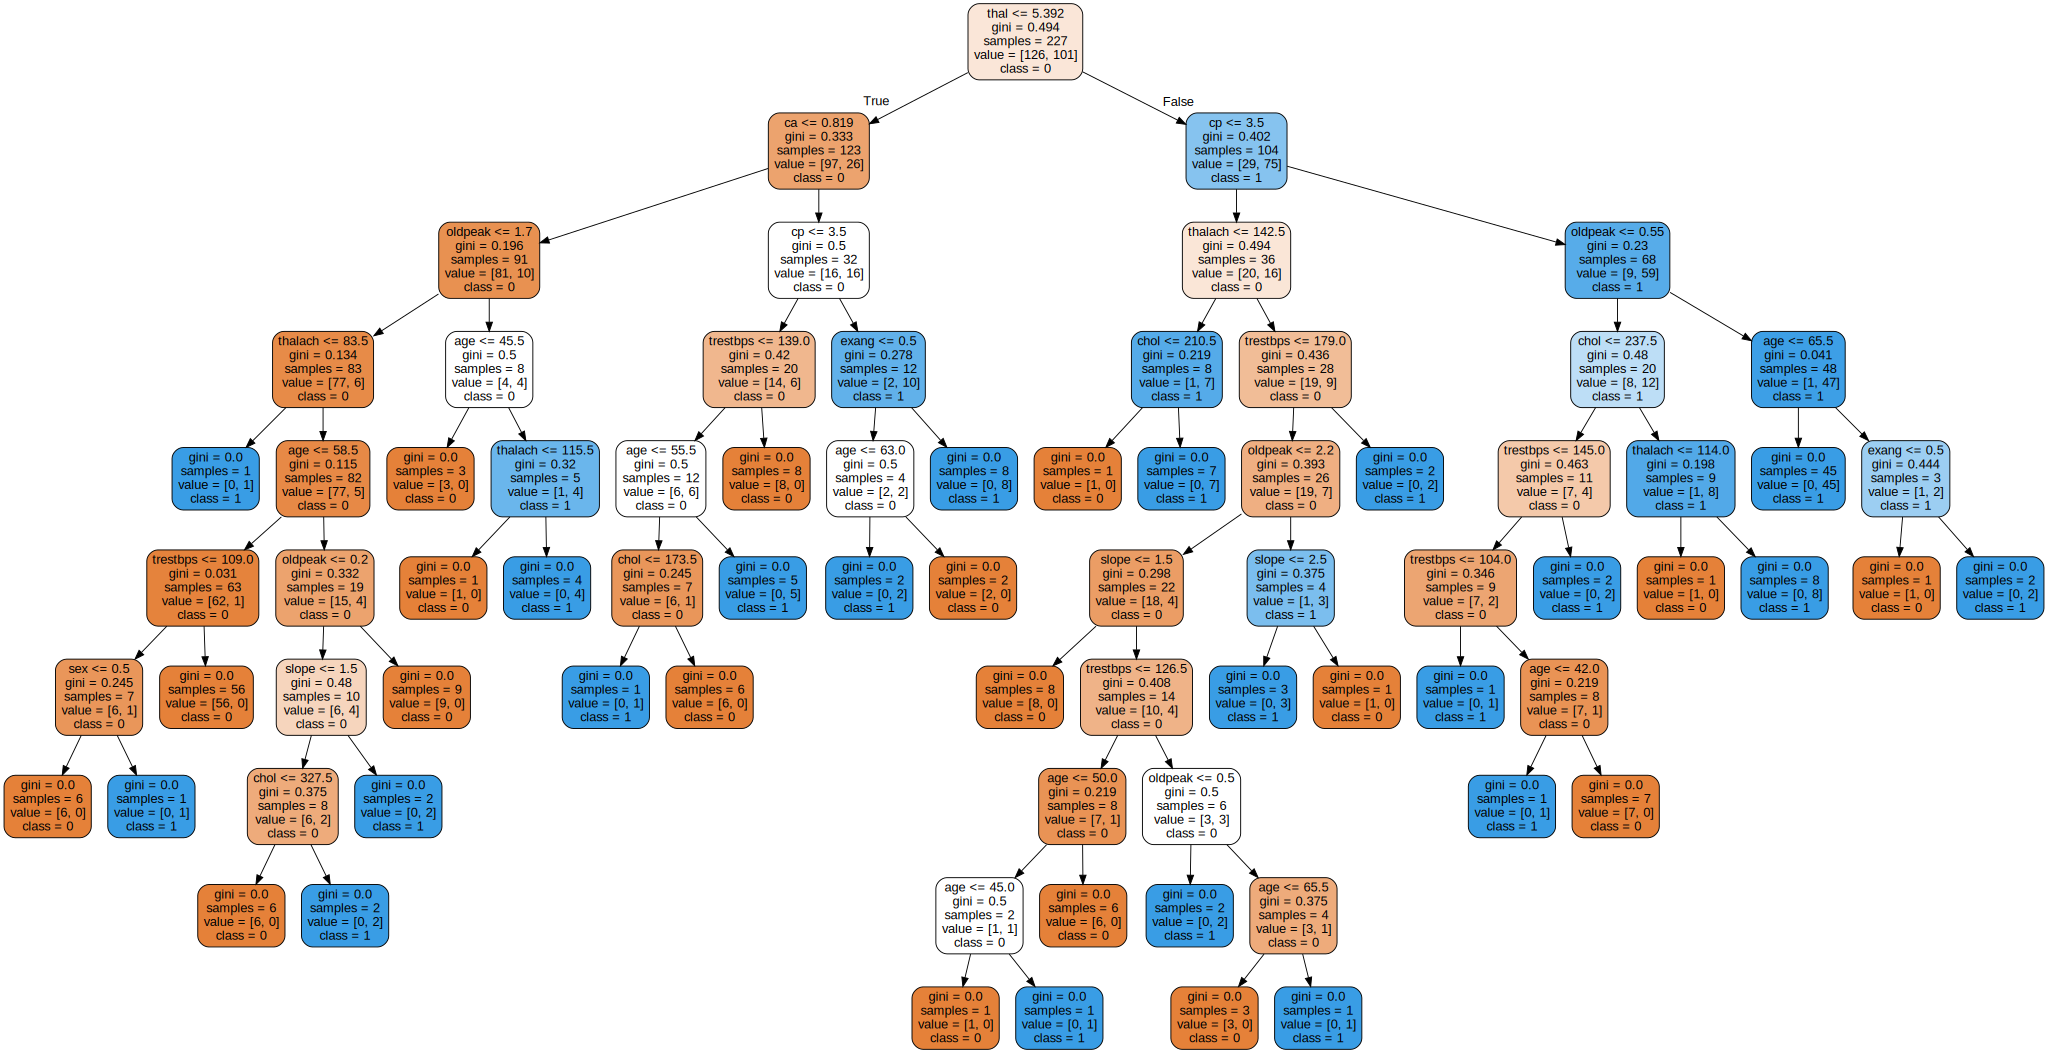

In [8]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [12]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

y_pred = gridcv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.76      0.74      0.75        38

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76



## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [13]:
clf = DecisionTreeClassifier()
Bagging = BaggingClassifier(estimator=clf,n_estimators=100,max_samples=X_train.shape[0],max_features=5)

Bagging.fit(X_train,y_train)

y_pred = Bagging.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        38
           1       0.94      0.79      0.86        38

    accuracy                           0.87        76
   macro avg       0.88      0.87      0.87        76
weighted avg       0.88      0.87      0.87        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [15]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        38
           1       0.94      0.82      0.87        38

    accuracy                           0.88        76
   macro avg       0.89      0.88      0.88        76
weighted avg       0.89      0.88      0.88        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [16]:
clf = DecisionTreeClassifier()
clf_1 = DecisionTreeClassifier()
bagged_tree = BaggingClassifier(clf, n_estimators=100, max_samples=X_train.shape[0], max_features=5)
rf = RandomForestClassifier()

In [17]:
pipe_dt = Pipeline([
    ("model_dt", clf)
])

pipe_bt = Pipeline([
    ("model_bt", bagged_tree)
])

pipe_rf = Pipeline([
    ("model_rf", rf)
])

In [18]:
param_dt = {
    "model_dt__criterion": ['gini', 'entropy', 'log_loss'],
    "model_dt__min_samples_leaf": [1, 3, 5, 7],
    "model_dt__max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

param_bt = {
    "model_bt__n_estimators": [10, 50, 100,],
    "model_bt__max_samples": [0.6, 0.8, 1.0],
    "model_bt__max_features": [5, 10]
}

param_rf = {
    "model_rf__n_estimators": [10, 50, 100,],
    "model_rf__max_depth": [1, 3, 5, 7, 9],
    "model_rf__min_samples_split": [2, 3, 4]
}

In [23]:
grid_rf = GridSearchCV(
    pipe_rf,
    param_rf,
    cv=5,
    scoring="f1_macro"
)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model_rf', RandomForestClassifier())]),
             param_grid={'model_rf__max_depth': [1, 3, 5, 7, 9],
                         'model_rf__min_samples_split': [2, 3, 4],
                         'model_rf__n_estimators': [10, 50, 100]},
             scoring='f1_macro')

In [24]:
ypred =grid_rf.predict(X_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        38
           1       0.97      0.82      0.89        38

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



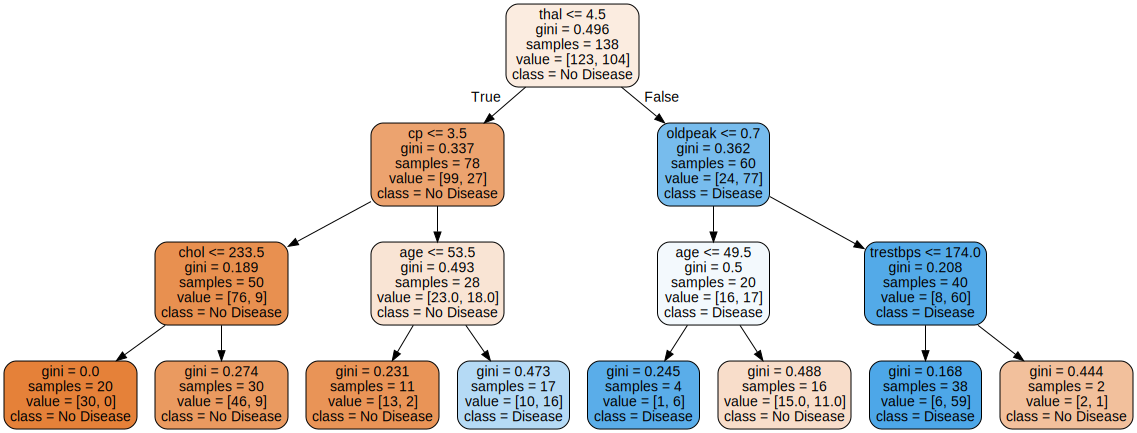

In [25]:
rf_best = grid_rf.best_estimator_
rf_model = rf_best.named_steps["model_rf"]

best_tree = rf_model.estimators_[0]

dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True
)

graphviz.Source(dot_data)